# Domácí úkol č. 1

Náhled tabulky s U.S. prezidentskými kandidáty v letech 1976-2020:

In [28]:
import pandas

us_presidents_orig = pandas.read_csv(fr'_data\1976-2020-president.csv')
us_presidents_orig.shape

(4287, 15)

In [29]:
us_presidents_orig.head(10)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN


Redukce sloupců tabulky pro zpřehlednění:

In [30]:
us_presidents = us_presidents_orig.filter(["year", "state", "candidate", "candidatevotes", "totalvotes", "party_simplified"])
us_presidents = us_presidents.sort_values(by=["year", "state", "candidatevotes"], ascending=[True, True, False])
us_presidents.head(10)

,year,state,candidate,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN
2,1976,ALABAMA,"MADDOX, LESTER",9198,1182850,OTHER
3,1976,ALABAMA,"BUBAR, BENJAMIN """"BEN""""",6669,1182850,OTHER
4,1976,ALABAMA,"HALL, GUS",1954,1182850,OTHER
5,1976,ALABAMA,"MACBRIDE, ROGER",1481,1182850,LIBERTARIAN
6,1976,ALABAMA,NaN,308,1182850,OTHER
7,1976,ALASKA,"FORD, GERALD",71555,123574,REPUBLICAN
8,1976,ALASKA,"CARTER, JIMMY",44058,123574,DEMOCRAT
9,1976,ALASKA,"MACBRIDE, ROGER",6785,123574,LIBERTARIAN


### 1. Pořadí kandidátů v rámci států a roků voleb

In [31]:
us_presidents["rank"] = us_presidents.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)
us_presidents.head(10)

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN,2.0
2,1976,ALABAMA,"MADDOX, LESTER",9198,1182850,OTHER,3.0
3,1976,ALABAMA,"BUBAR, BENJAMIN """"BEN""""",6669,1182850,OTHER,4.0
4,1976,ALABAMA,"HALL, GUS",1954,1182850,OTHER,5.0
5,1976,ALABAMA,"MACBRIDE, ROGER",1481,1182850,LIBERTARIAN,6.0
6,1976,ALABAMA,NaN,308,1182850,OTHER,7.0
7,1976,ALASKA,"FORD, GERALD",71555,123574,REPUBLICAN,1.0
8,1976,ALASKA,"CARTER, JIMMY",44058,123574,DEMOCRAT,2.0
9,1976,ALASKA,"MACBRIDE, ROGER",6785,123574,LIBERTARIAN,3.0


### 2. Redukce na vítězné strany

In [32]:
# konverze "agregátu" zpět na df - bylo by lepší využít raději reset_index, 
# příp. to_frame, jak doporučují tutorialy?
us_presidents = pandas.DataFrame(us_presidents)
winners = us_presidents[us_presidents["rank"] == 1.0]
winners = winners.sort_values(by=["state", "year"])
winners.shape

(612, 7)

In [33]:
winners.head(15)

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0
1674,1996,ALABAMA,"DOLE, ROBERT",769044,1534349,REPUBLICAN,1.0
2042,2000,ALABAMA,"BUSH, GEORGE W.",941173,1666272,REPUBLICAN,1.0
2411,2004,ALABAMA,"BUSH, GEORGE W.",1176394,1883415,REPUBLICAN,1.0
2728,2008,ALABAMA,"MCCAIN, JOHN",1266546,2099819,REPUBLICAN,1.0
3079,2012,ALABAMA,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,1.0


### 3. Shift - přidání předchozí vítězné strany

In [34]:
winners["prev_winner_party"] = winners["party_simplified"].shift(periods=1)

# bylo by dobré provést úpravu chybějících hodnot z roku 1976 nějak elegantněji, 
# příp. je (zatím) lepší používat numpy.NaN? (s pandas.NA tuším některé funkce nepracují)
winners.loc[winners["year"] == 1976, "prev_winner_party"] = pandas.NA
winners.head(15)

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,prev_winner_party
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,<NA>
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0,REPUBLICAN
1674,1996,ALABAMA,"DOLE, ROBERT",769044,1534349,REPUBLICAN,1.0,REPUBLICAN
2042,2000,ALABAMA,"BUSH, GEORGE W.",941173,1666272,REPUBLICAN,1.0,REPUBLICAN
2411,2004,ALABAMA,"BUSH, GEORGE W.",1176394,1883415,REPUBLICAN,1.0,REPUBLICAN
2728,2008,ALABAMA,"MCCAIN, JOHN",1266546,2099819,REPUBLICAN,1.0,REPUBLICAN
3079,2012,ALABAMA,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,1.0,REPUBLICAN


### 4. Doplnění údaje, zda došlo ke změně strany

In [35]:
import numpy
winners["party_change"] = numpy.where((winners["party_simplified"] != winners["prev_winner_party"]) & (pandas.notna(winners["prev_winner_party"])), 1, 0)
winners.head(15)

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,prev_winner_party,party_change
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,<NA>,0
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0,REPUBLICAN,0
1674,1996,ALABAMA,"DOLE, ROBERT",769044,1534349,REPUBLICAN,1.0,REPUBLICAN,0
2042,2000,ALABAMA,"BUSH, GEORGE W.",941173,1666272,REPUBLICAN,1.0,REPUBLICAN,0
2411,2004,ALABAMA,"BUSH, GEORGE W.",1176394,1883415,REPUBLICAN,1.0,REPUBLICAN,0
2728,2008,ALABAMA,"MCCAIN, JOHN",1266546,2099819,REPUBLICAN,1.0,REPUBLICAN,0
3079,2012,ALABAMA,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,1.0,REPUBLICAN,0


### 5. Seřazení států podle počtu změn stran

In [36]:
swing_states = winners.groupby("state")["party_change"].sum()
swing_states = pandas.DataFrame(swing_states)
swing_states = swing_states.sort_values("party_change", ascending=False)
display(swing_states)

,party_change
state,
OHIO,5
FLORIDA,5
GEORGIA,4
WISCONSIN,4
IOWA,4
PENNSYLVANIA,4
NEVADA,3
TENNESSEE,3
LOUISIANA,3


### 6. Sloupcový graf: swing states (první šestice)

[Text(0.5, 0, '')]

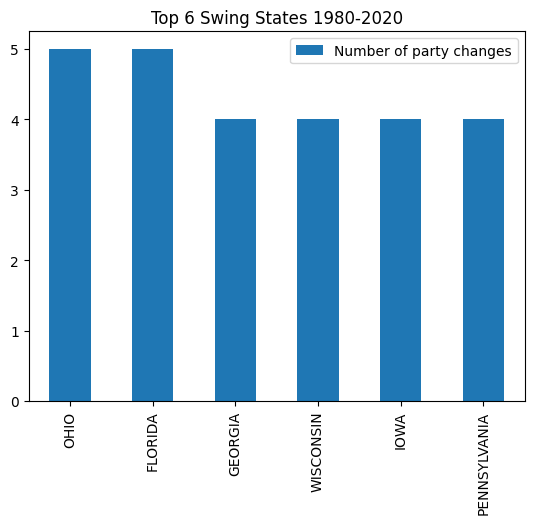

In [37]:
# výběr top 10 není možný, státy na pozici 7-19 mají stejný počet změn

import matplotlib.pyplot as plt
ax = swing_states[swing_states["party_change"] > 3].plot(kind="bar", title="Top 6 Swing States 1980-2020")
plt.legend(["Number of party changes"])
ax.set(xlabel=None)

### 7. Absolutní rozdíl mezi vítězem a druhým v pořadí

In [38]:
top2_candidates = us_presidents[(us_presidents["rank"] == 1.0) | (us_presidents["rank"] == 2.0)].copy()
top2_candidates.shape

(1224, 7)

In [39]:
top2_candidates.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN,2.0
7,1976,ALASKA,"FORD, GERALD",71555,123574,REPUBLICAN,1.0
8,1976,ALASKA,"CARTER, JIMMY",44058,123574,DEMOCRAT,2.0
11,1976,ARIZONA,"FORD, GERALD",418642,742719,REPUBLICAN,1.0


In [40]:
# bylo by lepší výpočet níže provést čistěji a možná i ekonomičtěji (?) s podmínkou jen pro rank == 1.0?
# (krok s podmínkou navíc vs. dvakrát více výpočtů, které přijdou do koše)
top2_candidates["abs_diff"] = top2_candidates["candidatevotes"] - top2_candidates["candidatevotes"].shift(periods=-1)

top2_candidates = top2_candidates[top2_candidates["rank"] == 1.0].copy()
top2_candidates.head(10)

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,abs_diff
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,155100.0
7,1976,ALASKA,"FORD, GERALD",71555,123574,REPUBLICAN,1.0,27497.0
11,1976,ARIZONA,"FORD, GERALD",418642,742719,REPUBLICAN,1.0,123040.0
19,1976,ARKANSAS,"CARTER, JIMMY",498604,767535,DEMOCRAT,1.0,230701.0
23,1976,CALIFORNIA,"FORD, GERALD",3882244,7803770,REPUBLICAN,1.0,139960.0
30,1976,COLORADO,"FORD, GERALD",584278,1081440,REPUBLICAN,1.0,123477.0
38,1976,CONNECTICUT,"FORD, GERALD",719261,1386355,REPUBLICAN,1.0,71366.0
43,1976,DELAWARE,"CARTER, JIMMY",122461,235642,DEMOCRAT,1.0,12681.0
50,1976,DISTRICT OF COLUMBIA,"CARTER, JIMMY",137818,168830,DEMOCRAT,1.0,109945.0
55,1976,FLORIDA,"CARTER, JIMMY",1636000,3150631,DEMOCRAT,1.0,166469.0


### 8. Relativní rozdíl

In [41]:
top2_candidates["rel_diff"] = top2_candidates["abs_diff"] / top2_candidates["totalvotes"]
top2_candidates.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,abs_diff,rel_diff
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,155100.0,0.131124
7,1976,ALASKA,"FORD, GERALD",71555,123574,REPUBLICAN,1.0,27497.0,0.222514
11,1976,ARIZONA,"FORD, GERALD",418642,742719,REPUBLICAN,1.0,123040.0,0.165662
19,1976,ARKANSAS,"CARTER, JIMMY",498604,767535,DEMOCRAT,1.0,230701.0,0.300574
23,1976,CALIFORNIA,"FORD, GERALD",3882244,7803770,REPUBLICAN,1.0,139960.0,0.017935


### 9. Seřazení podle relativního rozdílu

In [42]:
top2_candidates = top2_candidates.sort_values("rel_diff")
top2_candidates.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,abs_diff,rel_diff
2106,2000,FLORIDA,"BUSH, GEORGE W.",2912790,5963110,REPUBLICAN,1.0,537.0,0.000090
2266,2000,NEW MEXICO,"GORE, AL",286783,598605,DEMOCRAT,1.0,366.0,0.000611
2907,2008,MISSOURI,"MCCAIN, JOHN",1445814,2925205,REPUBLICAN,1.0,3903.0,0.001334
479,1980,MASSACHUSETTS,"REAGAN, RONALD",1057631,2524090,REPUBLICAN,1.0,3829.0,0.001517
241,1976,OREGON,"FORD, GERALD",492120,1029876,REPUBLICAN,1.0,1713.0,0.001663


### 10. Kontingenční tabulka

In [43]:
# numpy.select se zdá být jednodušší a prý i rychlejší než pandas.apply :-)
conditions = [(winners["party_change"] != 0) & (winners["party_simplified"] == "REPUBLICAN"), 
              (winners["party_change"] != 0) & (winners["party_simplified"] == "DEMOCRAT"), 
              pandas.isna(winners["prev_winner_party"])]
winners["changed_to"] = numpy.select(conditions, ["REP", "DEM", pandas.NA], "none")
winners.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,prev_winner_party,party_change,changed_to
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,<NA>,0,<NA>
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0,DEMOCRAT,1,REP
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0,REPUBLICAN,0,none
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0,REPUBLICAN,0,none
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0,REPUBLICAN,0,none


In [44]:
# uff, dohledat aggfunc "size" mi dalo chvilku zabrat :-)
# "len", příp. "count" mi nevracely četnost v rámci jedné proměnné - prý nefungují u df s více sloupci 
# (https://stackoverflow.com/questions/22412033/python-pandas-pivot-table-count-frequency-in-one-column)
winners_pivot = pandas.pivot_table(data=winners, index="year", columns="changed_to", aggfunc="size", fill_value=0)
winners_pivot

changed_to,DEM,REP,none
year,,,
1980,0,16,35
1984,0,6,45
1988,9,0,42
1992,22,0,29
1996,2,3,46
2000,0,11,40
2004,1,2,48
2008,9,0,42
2012,0,2,49
